## Problem 2

### A cloth manufacturing company is interested to know about the segment or attributes which causes high sale.Use Decision tree classifier and Decision tree regressor to achieve the objective

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
company=pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### EDA

In [3]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company[company.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


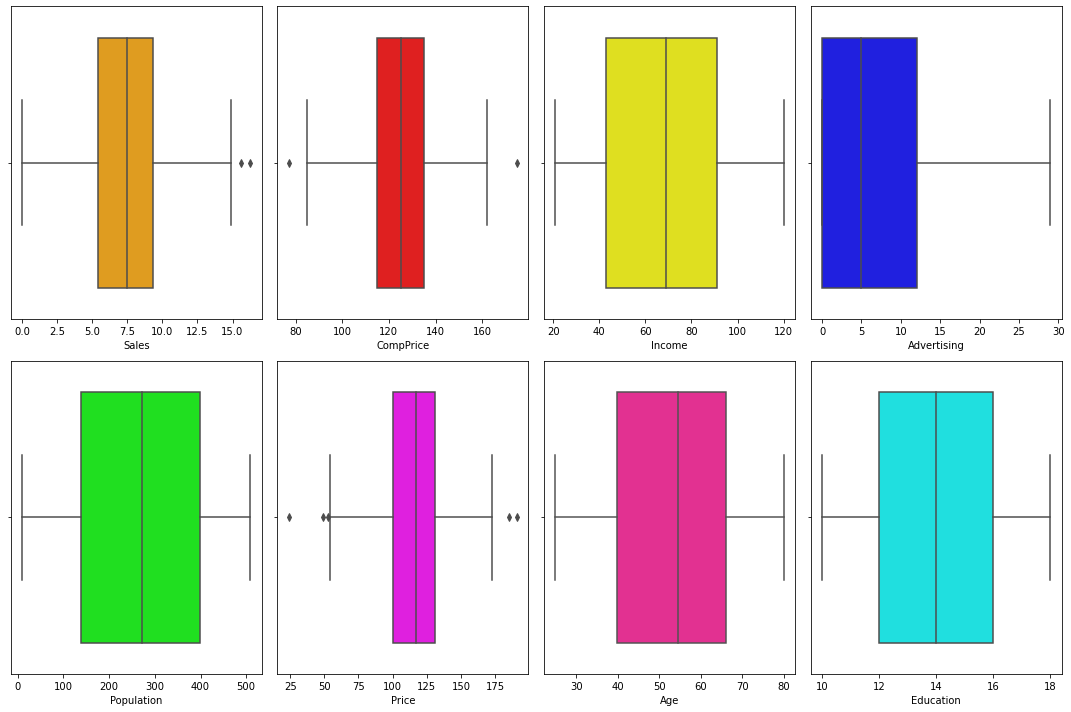

In [6]:
# Checking for the outliers using boxplot

fig,ax = plt.subplots(2,4, figsize=(15,10))

sns.boxplot(company["Sales"],ax=ax[0,0],color="orange")
sns.boxplot(company["CompPrice"],ax=ax[0,1],color="red")
sns.boxplot(company["Income"],ax=ax[0,2],color="yellow")
sns.boxplot(company["Advertising"],ax=ax[0,3],color="blue")
sns.boxplot(company["Population"],ax=ax[1,0],color="lime")
sns.boxplot(company["Price"],ax=ax[1,1],color="magenta")
sns.boxplot(company["Age"],ax=ax[1,2],color="deeppink")
sns.boxplot(company["Education"],ax=ax[1,3],color="cyan")

plt.tight_layout()
plt.show()

In [7]:
# Find the average sales and classifying the categories that are greater than the average sales values, as the fast moving product segments.
company["sales"]=(company["Sales"]>7.49)*1

In [8]:
# label encoding for categorical values
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
company["ShelveLoc"]=LE.fit_transform(company["ShelveLoc"])
company["Urban"]=LE.fit_transform(company["Urban"])
company["US"]=LE.fit_transform(company["US"])

In [9]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


<AxesSubplot:>

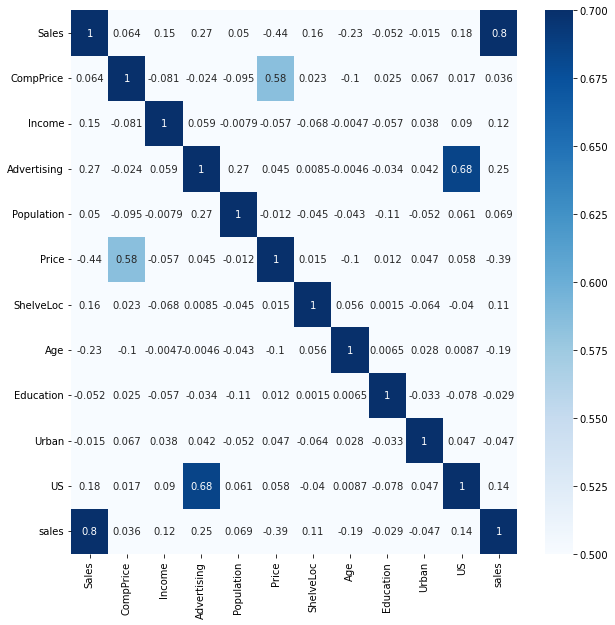

In [10]:
# Correlation using Heatmap
plt.figure(figsize=[10,10])
sns.heatmap(company.corr(),cmap="Blues",annot=True,vmin=0.5,vmax=0.7)

In [11]:
# Spliting the data into dependent and independent
x=company.iloc[:,0:10]
y=company.iloc[:,10]

In [12]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,9.50,138,73,11,276,120,0,42,17,1
1,11.22,111,48,16,260,83,1,65,10,1
2,10.06,113,35,10,269,80,2,59,12,1
3,7.40,117,100,4,466,97,2,55,14,1
4,4.15,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1
396,6.14,139,23,3,37,120,2,55,11,0
397,7.41,162,26,12,368,159,2,40,18,1
398,5.94,100,79,7,284,95,0,50,12,1


In [13]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [14]:
# Splitting data for training and testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=20)

In [17]:
x_train

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
94,8.39,115,97,5,134,84,0,55,11,1
91,4.81,97,46,11,267,107,2,80,15,1
89,7.95,128,66,3,493,119,2,45,16,0
329,11.27,100,54,9,433,89,1,45,12,1
129,4.47,143,120,7,279,147,0,40,10,0
...,...,...,...,...,...,...,...,...,...,...
393,5.57,109,51,10,26,120,2,30,17,0
218,9.70,138,61,12,156,120,2,25,14,1
223,3.45,110,45,9,276,125,2,62,14,1
271,4.55,111,56,0,504,110,2,62,16,1


In [18]:
x_test

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
10,9.01,121,78,9,150,100,0,26,10,0
382,4.95,121,28,19,315,121,2,66,14,1
374,9.44,131,47,7,90,118,2,47,12,1
196,4.10,130,28,6,410,133,0,72,16,1
47,4.38,126,98,0,173,108,0,55,16,1
...,...,...,...,...,...,...,...,...,...,...
336,5.17,138,35,6,60,143,0,28,18,1
398,5.94,100,79,7,284,95,0,50,12,1
45,4.56,141,63,0,168,135,0,44,12,1
373,5.58,137,71,0,402,116,2,78,17,1


In [19]:
y_train

94     1
91     1
89     0
329    1
129    1
      ..
393    1
218    1
223    1
271    0
355    0
Name: US, Length: 320, dtype: int32

In [20]:
y_test

10     1
382    1
374    1
196    1
47     0
      ..
336    0
398    1
45     1
373    0
28     1
Name: US, Length: 80, dtype: int32

## Decision Tree 

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [22]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

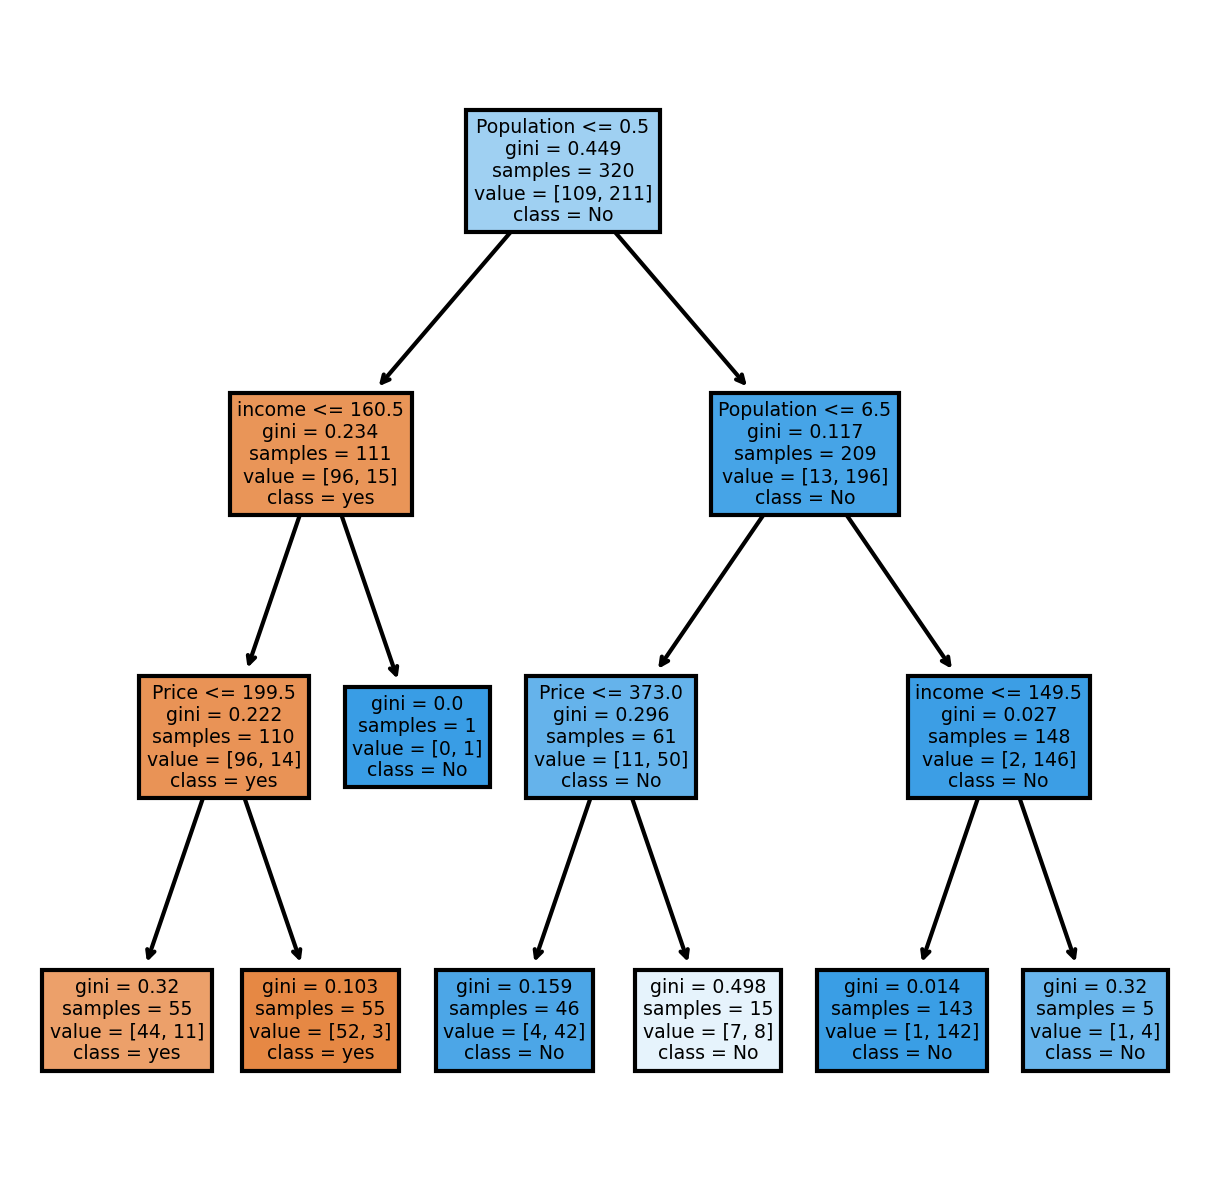

In [27]:
# visualization for decision tree
fn=['compPrice',"income","Advertisiing","Population","Price","ShelveLoc","Age","Education","Us","price"]
cn=["yes","No"]
fig,axes = plt.subplots(nrows = 1, ncols=1, figsize = (5,5), dpi= 300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled=True);


In [28]:
#checking the score
model.score(x_train,y_train)

0.915625

In [29]:
# Predicting with test data
pred = model.predict(x_test)

In [31]:
# checking the accuracy with prediction and tested
np.mean(pred==y_test)

0.9

In [32]:
# checking the model score
model.score(x_test,y_test)

0.9

In [33]:
model.feature_importances_

array([0.        , 0.01830811, 0.        , 0.93835396, 0.04333793,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
y_pred=pred

("Accuracy Score:",accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.9)

In [42]:
# prediction with probabilities of the classes
model.predict_proba(x_test)

array([[0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.46666667, 0.53333333],
       [0.8       , 0.2       ],
       [0.2       , 0.8       ],
       [0.8       , 0.2       ],
       [0.8       , 0.2       ],
       [0.8       , 0.2       ],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.08695652, 0.91304348],
       [0.8       , 0.2       ],
       [0.94545455, 0.05454545],
       [0.94545455, 0.05454545],
       [0.00699301, 0.99300699],
       [0.8       , 0.2       ],
       [0.94545455, 0.05454545],
       [0.8       , 0.2       ],
       [0.94545455, 0.05454545],
       [0.00699301, 0.99300699],
       [0.8       , 0.2       ],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.8       , 0.2       ],
       [0.00699301, 0.99300699],
       [0.8       , 0.2       ],
       [0.00699301, 0.99300699],
       [0.

Text(0.5, 1.0, 'Accuracy score:0.9')

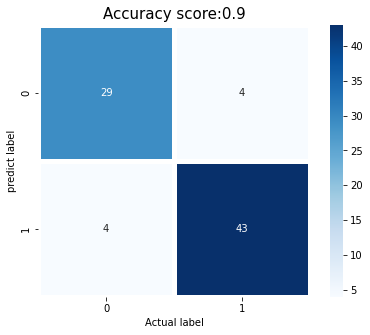

In [45]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('predict label')
sample="Accuracy score:{0}".format(model.score(x_test,y_test))
plt.title(sample,size=15)

In [46]:
# Classification report - y_test data and the predicted data
print("Classification report - \n",classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.91      0.91      0.91        47

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



In [50]:
# creating a for loop to identify the train and test accuracy of the prediction, With the change in the max_depth feature of the decision tree class
train_accuracy=[]
test_accuracy=[]
for i in range(1,11):
    model1=DecisionTreeClassifier(criterion="entropy", max_depth=i,random_state=40)
    model1.fit(x_train,y_train)
    train_accuracy.append(model1.score(x_train,y_train))
    test_accuracy.append(model1.score(x_test,y_test))

In [51]:
# finding the accuracies in different maximum depth in training and test data
accuracy = pd.DataFrame({"max_depth":range(1,11),"train_acc":train_accuracy,"test_acc":test_accuracy})
accuracy

,max_depth,train_acc,test_acc
0,1,0.912500,0.9000
1,2,0.912500,0.9000
2,3,0.912500,0.9000
3,4,0.925000,0.8750
4,5,0.946875,0.8500
5,6,0.956250,0.8875
6,7,0.971875,0.8875
7,8,0.975000,0.8750
8,9,0.978125,0.8750
9,10,0.984375,0.8875


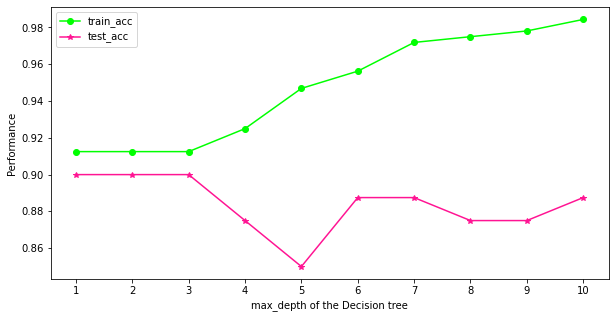

In [53]:
# visualization
labels=["train_acc","test_acc"]
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot()
plt.plot(accuracy["max_depth"],accuracy["train_acc"],marker="o",color="lime")
plt.plot(accuracy["max_depth"],accuracy["test_acc"],marker="*",color="deeppink")
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel("max_depth of the Decision tree")
plt.ylabel("Performance")
plt.show()

In [64]:
# Decision tree regression
from sklearn.tree import DecisionTreeRegressor
array=company.values
X=array[:,0:10]
Y=array[:,10]

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.40, random_state=40)


In [67]:
model1=DecisionTreeRegressor()
model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
# Identifying the accuracy of the test data
model1.score(x_test,y_test)

0.09311740890688258

## Inference:

### The decision tree classification gives good accuracies based on the maximum depth. When the maximum depth of the decision tree is 9, the accuracy of the classification algorithm gives 88.75%.And also we can see that decision tree regression is not an advisible method for classifying the salary data. The accuracy value is very low.

## ======================================================================================